In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%matplotlib inline
import math
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import plotly.express as px

import warnings

In [6]:
#dataFrame
creditcard_df_original = pd.read_csv('/content/drive/MyDrive/1_Thinkful_Colab_Notebooks/csv files/BankChurners.csv')

In [ ]:
#get some details about our dataset
creditcard_df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

#**---------------------Step 1: Exploratory Data Analysis---------------------------------**

---




In [ ]:
creditcard_df_original.shape

(10127, 23)

##We have a table with 23 Variables (Columns) and 10,127 Rows.

In [ ]:
creditcard_df_original.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


###I will drop unnecessary variables `CLIENTNUM` and the last 2 columns with `Naive_Bayes`, since they won't be useful for our model.

In [7]:
#make a copy of the original df
creditcard_df = creditcard_df_original.copy()
#drop 'CLIENTNUM' column
creditcard_df = creditcard_df.drop(['CLIENTNUM'], axis=1)
#drop the last 2 columns
creditcard_df = creditcard_df.drop(creditcard_df.columns[-2:], axis=1)
creditcard_df.head(2)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


#Variables description.
##There 20 variables. 
##1. Attrition_Flag - Status of customer relationship with bank. Have they churn  or are they still with the bank.
##2. Customer_Age - Age of customer.
##3. Gender - Gender of customer.
##4. Dependent_count - number of dependents under the customer.
##5. Education_Level - Customer's highest level of education. Where *`Uneducated` - no education, `High School` - some high school education, `Graduate` - graduated high school, `College` - college degree, `Post-Graduate` - masters degree, `Doctorate` - doctorate degree.*
##6. Marital_Status - customer's marital status; single, married or divorced.
##7. Income_Category - how much income the customer earns. 
##8. Card_Category - type of card subcribed to by customer.
##9. Months_on_book - the number of months customer was/is with the bank.
##10.Total_Relationship_Count - number of bank products customer is subscribed to.
##11. Months_Inactive_12_mon - number of months customer card was inactive in a 12 month period. 
##12. Contacts_Count_12_mon - how many times a customer contacted the back in a 12 month period.
##13. Credit_Limit - credit limit of customer's credit card.
##14. Total_Revolving_Bal - revolving balance on the customer credit card.
##15. Avg_Open_To_Buy - average open to buy.
##16. Total_Amt_Chng_Q4_Q1 - total amount change from quarter 4 to quater 1.
##17. Total_Trans_Amt - total transaction amount.
##18. Total_Trans_Ct - total number of transactions by customer.
##19. Total_Ct_Chng_Q4_Q1 - total number of transaction change from quarter 4 to quater 1.
##20. Avg_Utilization_Ratio - average utilization ratio of card.

In [ ]:
creditcard_df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64


###***Checking for missing data.***

In [8]:
#check for % of missing values
((creditcard_df.isna().sum())*100)/creditcard_df.shape[1]

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

###There are no missing data.

#**Exploring the Categorical Variables**

In [9]:
#show the non-numerical variables
non_numerical_var = creditcard_df.select_dtypes('object')
print(f'{non_numerical_var.columns.unique()}, {len(non_numerical_var)} non-numerical variables')

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object'), 10127 non-numerical variables


In [10]:
#create a categorical variables df by concatinating non_numerical_var and the numerical categorical variables
categorical_variables = pd.concat([non_numerical_var,
                                   creditcard_df[['Dependent_count','Total_Relationship_Count',
                                                  'Months_Inactive_12_mon','Contacts_Count_12_mon']]],axis=1)
categorical_variables.head(3)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon
0,Existing Customer,M,High School,Married,$60K - $80K,Blue,3,5,1,3
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue,5,6,1,2
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue,3,4,1,0


In [11]:
#show a dictionary containing the non-numerical variables and their unique values 
non_numerical_var_dict ={column: list(non_numerical_var[column].unique()) for column in non_numerical_var.columns}
non_numerical_var_dict

{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Gender': ['M', 'F'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced']}

###I can see that there are missing data in the form of 'Unknown' categories in `Education_Level`, `Income_Category` and `Marital_Status`.

###There are 10 categorical variables `Attrition_Flag`,`Gender`, `Dependent_count`, `Education_Level`, `Marital_Status`, `Income_Category`, `Card_Category`, `Total_Relationship_Count`, `Months_Inactive_12_mon` and `Contacts_Count_12_mon`. 
###Although `Dependent_count`, `Total_Relationship_Count`, `Months_Inactive_12_mon` and `Contacts_Count_12_mon` are numerical data, they are still categorical variables and will be analysed as such.

**Attrition_Flag (Existing customers vs Attrited/Churned customers)**

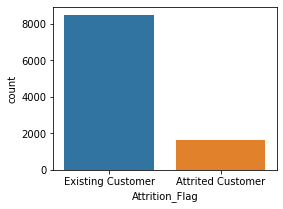

In [ ]:
plt.figure(figsize=(4, 3))
sns.countplot(x=creditcard_df['Attrition_Flag'])
plt.show()

fig = px.pie(creditcard_df['Attrition_Flag'].value_counts(False), values='Attrition_Flag', 
             names = creditcard_df['Attrition_Flag'].value_counts(False).index,
             title = 'Attrition_Flag', template='ggplot2')
fig.show()

In [ ]:
#value counts
creditcard_df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

###There is imbalanced data; 8500 customers or 83.9% are existing customers, while 1627 customers or 16.1% have churned the business. I will have to balance this dataset to build a model with high precision and recall.

###***Univariate Analysis of the categorical variables***

####**1. *Gender***

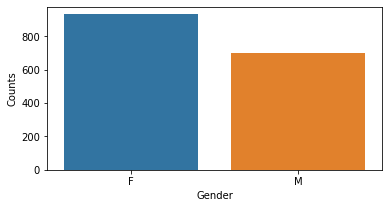

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Gender')
#sns.barplot(x=creditcard_df.groupby(['Gender'])['Attrition_Flag'].count().index, y=creditcard_df.groupby(['Gender'])['Attrition_Flag'].count())
plt.ylabel('Counts')
plt.show()

fig = px.pie(creditcard_df['Gender'].value_counts(False),
             values='Gender', names = creditcard_df['Gender'].value_counts(False).index,
             title = 'Gender', template='ggplot2')
fig.show()

###The customers are comprized of 52.9% Female and 47.1% Male.
###Customers that have attritted (churned) looks to be proportionally distributed between males and females. There are slightly more female churners but this probably because there are more female customers.

####**2. *Education_Level***

In [ ]:
fig = px.pie(creditcard_df['Education_Level'].value_counts(False),
             values='Education_Level', 
             names = creditcard_df['Education_Level'].value_counts(False).index,
             title = 'Education_Level', template='ggplot2')
fig.show()

###There are no education level information for 15% of the customers.
###14.7% are uneducated.
###19.9% of the customers have some high-school education as their highest level of education.
###30.0% of the customers have high-school graduation as their highest level of education.
###10% of the customers have college education as their highest level of education.
###5.1% of the customers have post-graduate as their highest level of education.
###4.45% of the customers have doctorate as their highest level of education.

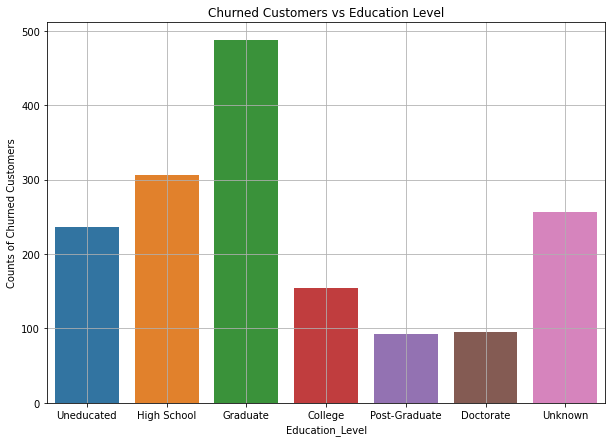

In [ ]:
plt.figure(figsize=(10,7))
education_sorted = ['Uneducated', 'High School', 'Graduate', 'College', 'Post-Graduate', 'Doctorate', 'Unknown']
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Education_Level', order=education_sorted)
plt.ylabel('Counts of Churned Customers')
plt.title('Churn distribution w.r.t. Education Level')
plt.grid()
plt.show()

###Customers with high school graduate as highest education level are the most churners, followed by customers with some high school education.

####**3. *Marital_Status***

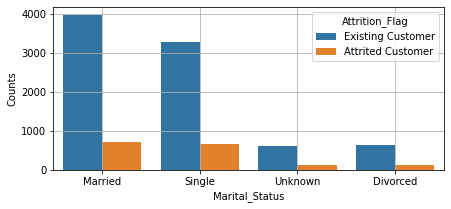

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(data=creditcard_df, x='Marital_Status', hue='Attrition_Flag')
plt.ylabel('Counts')
plt.grid()
plt.show()

fig = px.pie(creditcard_df['Marital_Status'].value_counts(False),
             values='Marital_Status', 
             names = creditcard_df['Marital_Status'].value_counts(False).index,
             title = 'Marital_Status', template='ggplot2')
fig.show()

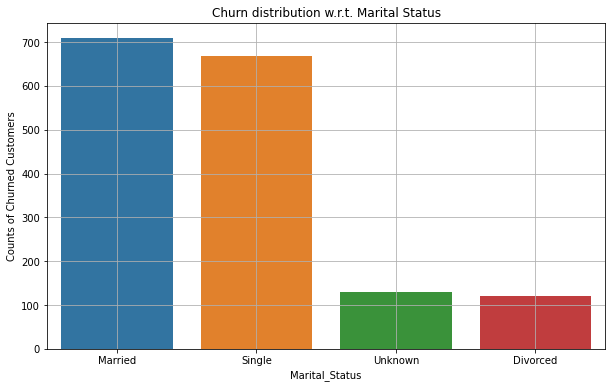

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Marital_Status')
plt.ylabel('Counts of Churned Customers')
plt.title('Churn distribution w.r.t. Marital Status')
plt.grid()
plt.show()

###There isn't much difference in churn between the Married customers and Single customers.

####**4. *Income_Category***

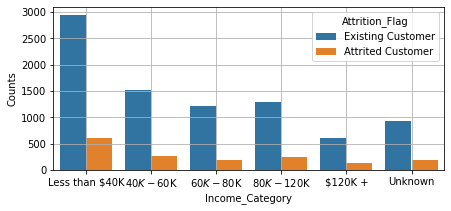

In [ ]:
plt.figure(figsize=(7,3))
income_sorted = ['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K', '$120K +','Unknown']
sns.countplot(data=creditcard_df, x='Income_Category', hue='Attrition_Flag', order=income_sorted)
plt.ylabel('Counts')
plt.grid()
plt.show()

fig = px.pie(creditcard_df['Income_Category'].value_counts(False),
             values='Income_Category', 
             names = creditcard_df['Income_Category'].value_counts(False).index,
             title = 'Income_Category', template='ggplot2')
fig.show()

###35% of the customers make less than \$40K. Majoring of the customers, 52.9%, make $60K or less. The income of 11% of the customers is unknown. I will have to replace them before I model. 

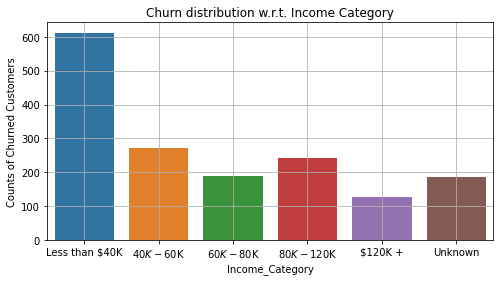

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Income_Category', order=income_sorted)
plt.ylabel('Counts of Churned Customers')
plt.title('Churn distribution w.r.t. Income Category')
plt.grid()
plt.show()

###Customers that make less than $40k are the most churners.

####**5. *Card_Category***

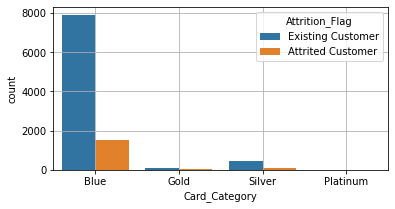

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(data=creditcard_df, x='Card_Category', hue='Attrition_Flag')
plt.grid()
plt.show()

fig = px.pie(creditcard_df['Card_Category'].value_counts(False), values='Card_Category', names = creditcard_df['Card_Category'].value_counts(False).index,title = 'Card_Category', template='ggplot2')
fig.show()

###The most popular type of card owned by the customers is the Blue card at a rate of 93.2%, followed by the silver card at 5.48% and then the Gold and Platinum cards at 1.15% and 0.197%, respectively.

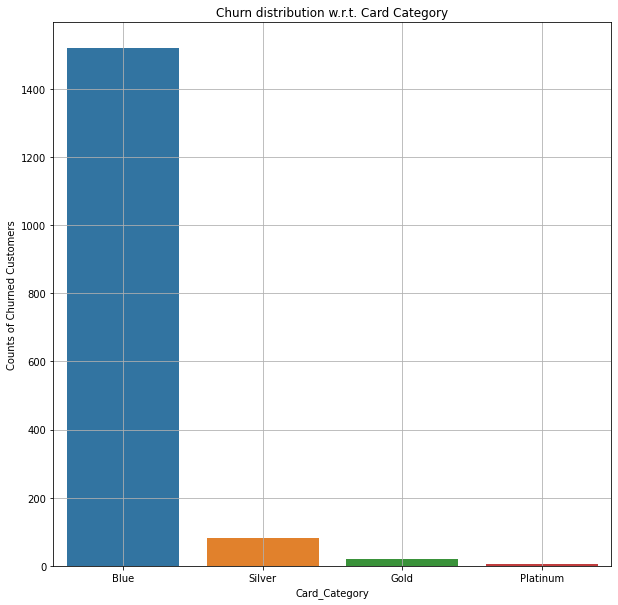

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Card_Category')
plt.ylabel('Counts of Churned Customers')
plt.title('Churn distribution w.r.t. Card Category')
plt.grid()
plt.show()

####Most churners have blue cards.

####**6. *Dependent_count***

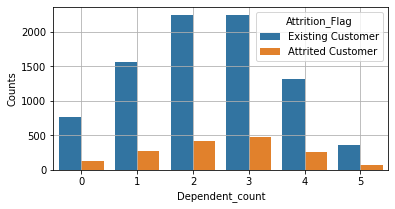

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(data=creditcard_df, x='Dependent_count', hue='Attrition_Flag')
plt.ylabel('Counts')
plt.grid()
plt.show()

fig = px.pie(creditcard_df['Dependent_count'].value_counts(False), 
             values='Dependent_count', 
             names = creditcard_df['Dependent_count'].value_counts(False).index,title = 'Dependent_count', template='ggplot2')
fig.show()

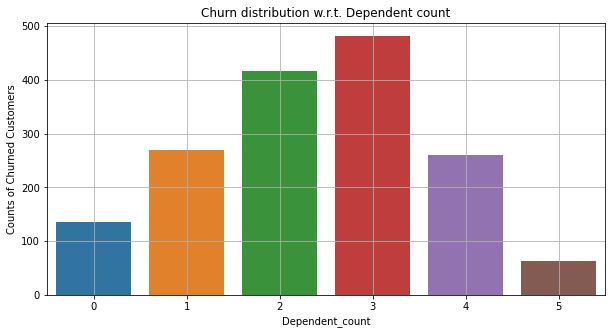

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Dependent_count')
plt.ylabel('Counts of Churned Customers')
plt.title('Churn distribution w.r.t. Dependent count')
plt.grid()
plt.show()

####Customers with 3 dependents have a highest churn rate.

####**7. *Total_Relationship_Count***

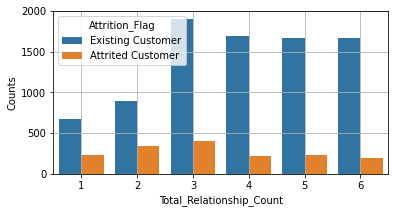

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(data=creditcard_df, x='Total_Relationship_Count', hue='Attrition_Flag')
plt.ylabel('Counts')
plt.grid()
plt.show()

fig = px.pie(creditcard_df['Total_Relationship_Count'].value_counts(False), 
             values='Total_Relationship_Count', 
             names = creditcard_df['Total_Relationship_Count'].value_counts(False).index,title = 'Total_Relationship_Count', template='ggplot2')
fig.show()

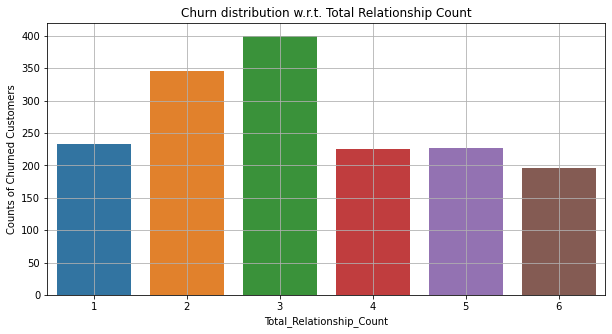

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Total_Relationship_Count')
plt.ylabel('Counts of Churned Customers')
plt.title('Churn distribution w.r.t. Total Relationship Count')
plt.grid()
plt.show()

####`Total_Relationship_Count` (i.e number of bank products subscribed to) appears to have an effect on churn. Customers subscribed to 1 and 2 number of products have the highest churn rate, even though there are fewer of them. Customers subscribed to more products have lower churn rate.

####**8. *Months_Inactive_12_mon***

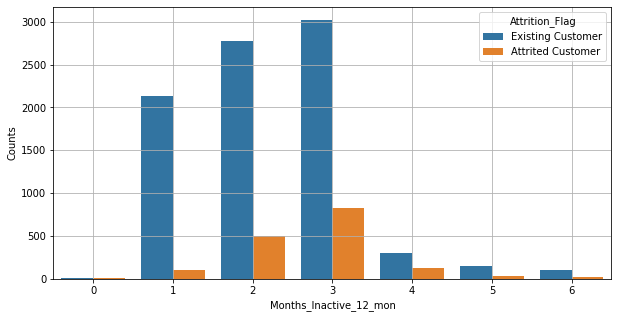

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=creditcard_df, x='Months_Inactive_12_mon', hue='Attrition_Flag')
plt.ylabel('Counts')
plt.grid()
plt.show()

fig = px.pie(creditcard_df['Months_Inactive_12_mon'].value_counts(False), 
             values='Months_Inactive_12_mon', 
             names = creditcard_df['Months_Inactive_12_mon'].value_counts(False).index,title = 'Months_Inactive_12_mon', template='ggplot2')
fig.show()

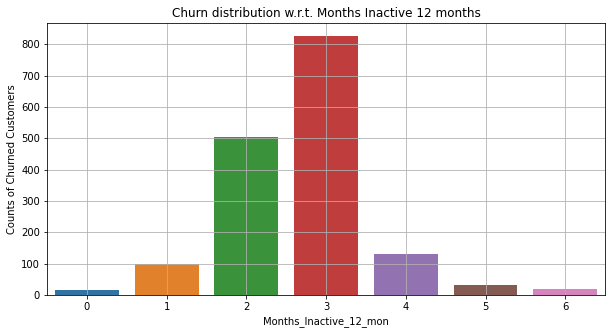

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Months_Inactive_12_mon')
plt.ylabel('Counts of Churned Customers')
plt.title('Churn distribution w.r.t. Months Inactive 12 months')
plt.grid()
plt.show()

Customers who have been inactive for 3 months in a year are the most churners.

####**9. *Contacts_Count_12_mon***

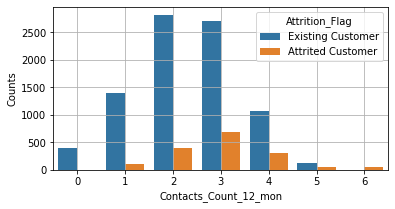

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(data=creditcard_df, x='Contacts_Count_12_mon', hue='Attrition_Flag')
plt.ylabel('Counts')
plt.grid()
plt.show()

fig = px.pie(creditcard_df['Contacts_Count_12_mon'].value_counts(False), 
             values='Contacts_Count_12_mon', 
             names = creditcard_df['Contacts_Count_12_mon'].value_counts(False).index,title = 'Contacts_Count_12_mon', template='ggplot2')
fig.show()

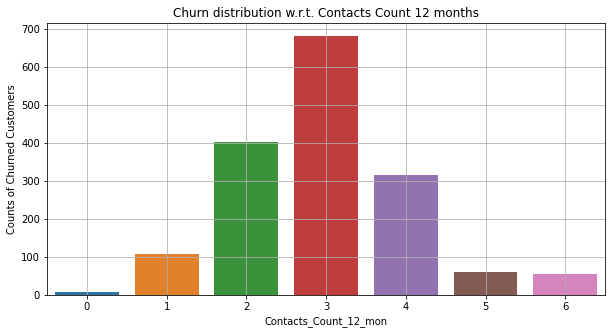

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Contacts_Count_12_mon')
plt.ylabel('Counts of Churned Customers')
plt.title('Churn distribution w.r.t. Contacts Count 12 months')
plt.grid()
plt.show()

####`Contacts_Count_12_mon` appears to have an effect on churn. Customers who have contacted the customer-care three or more times have a higher churn rate.

##***Bi-Variate analysis of Categorical variables***

####***Education_Level and Gender***

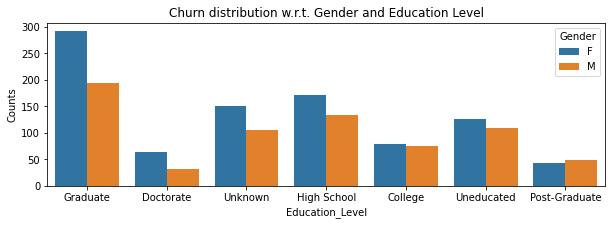

In [ ]:
plt.figure(figsize=(10, 3))
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Education_Level', hue='Gender')
plt.ylabel('Counts of Churned Customers')
plt.title('Churn distribution w.r.t. Gender and Education Level')
plt.ylabel('Counts')
plt.show()

###Females who's education level is Graduate, are most churners.

####***Marital_Status and Gender***

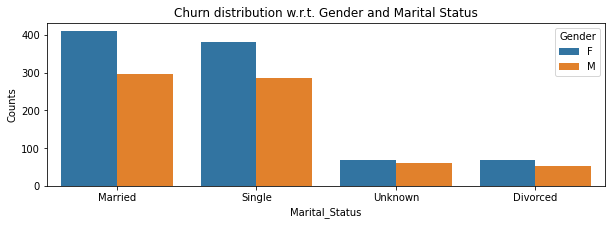

In [ ]:
plt.figure(figsize=(10, 3))
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Marital_Status', hue='Gender')
plt.ylabel('Counts of Churned Customers')
plt.title('Churn distribution w.r.t. Gender and Marital Status')
plt.ylabel('Counts')
plt.show()

There is no insight here, since there isn't much difference between females and males.

####***Income_Category and Gender***

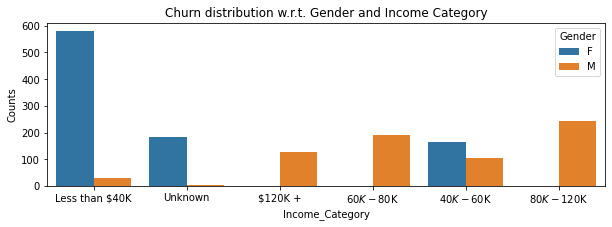

In [ ]:
plt.figure(figsize=(10, 3))
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Income_Category', hue='Gender')
plt.ylabel('Counts of Churned Customers')
plt.title('Churn distribution w.r.t. Gender and Income Category')
plt.ylabel('Counts')
plt.show()

*   Of all customers making less than $40K, females are the most churners.

*   Of all customers making $60K - $80K, males are the most churners.

*   Of all customers making $80K - $120K, males are the most churners.

*   Of all customers making $120K+, males are the most churners.




####***Card_Category and Gender***

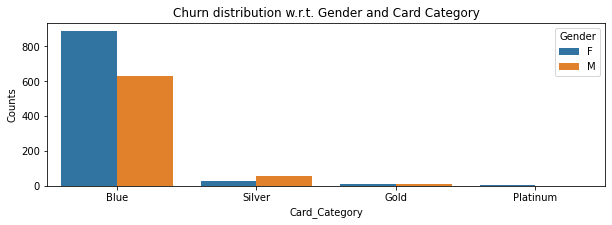

In [ ]:
plt.figure(figsize=(10, 3))
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Card_Category', hue='Gender')
plt.ylabel('Counts of Churned Customers')
plt.title('Churn distribution w.r.t. Gender and Card Category')
plt.ylabel('Counts')
plt.show()

Females with blue cards are most churners.

####***Dependent_count and Gender***

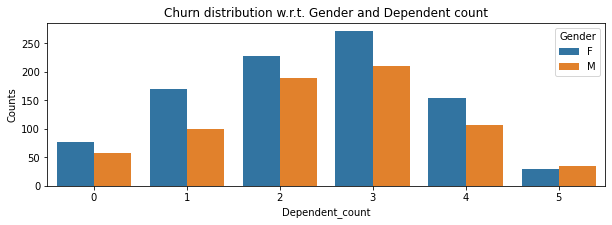

In [ ]:
plt.figure(figsize=(10, 3))
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Dependent_count', hue='Gender')
plt.ylabel('Counts of Churned Customers')
plt.title('Churn distribution w.r.t. Gender and Dependent count')
plt.ylabel('Counts')
plt.show()

There is no insight to be gained here.

####***Total_Relationship_Count and Gender***

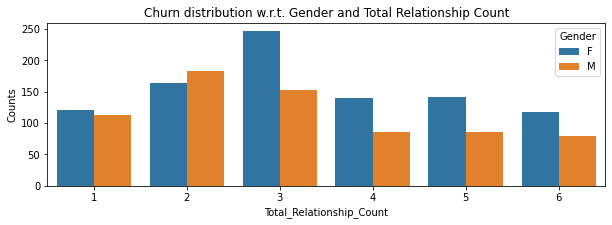

In [ ]:
plt.figure(figsize=(10, 3))
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Total_Relationship_Count', hue='Gender')
plt.ylabel('Counts of Churned Customers')
plt.title('Churn distribution w.r.t. Gender and Total Relationship Count')
plt.ylabel('Counts')
plt.show()

Females subscribed to 3 or more products are the most churners.

####***Months_Inactive_12_mon and Gender***

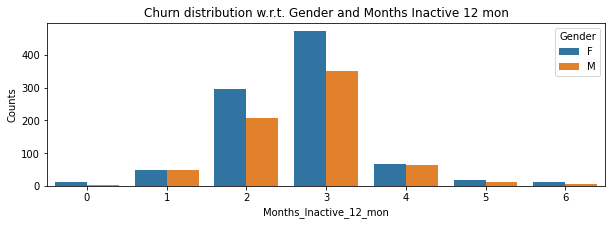

In [ ]:
plt.figure(figsize=(10, 3))
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Months_Inactive_12_mon', hue='Gender')
plt.ylabel('Counts of Churned Customers')
plt.title('Churn distribution w.r.t. Gender and Months Inactive 12 mon')
plt.ylabel('Counts')
plt.show()



*   Females who have been inactive for 2 months in a 12 month period are likely to churn.

*   Females who have been inactive for 3 months in a 12 month period are likely to churn.



####***Contacts_Count_12_mon and Gender***

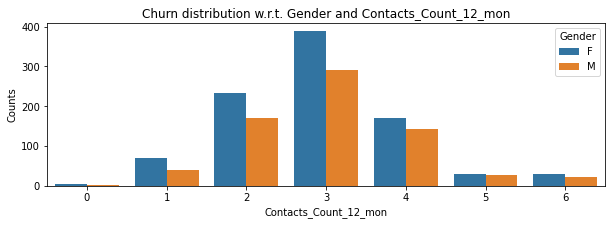

In [ ]:
plt.figure(figsize=(10, 3))
sns.countplot(data=creditcard_df[creditcard_df['Attrition_Flag']=='Attrited Customer'], x='Contacts_Count_12_mon', hue='Gender')
plt.ylabel('Counts of Churned Customers')
plt.title('Churn distribution w.r.t. Gender and Contacts_Count_12_mon')
plt.ylabel('Counts')
plt.show()

Females who contacted customer care 3 times in a 12 month period are the most churners.

#Exploring the Continuous Variables

In [12]:
#variable for numerical variables
numerical_variables = creditcard_df.select_dtypes(['int64', 'float64'])
numerical_variables_df = pd.DataFrame(numerical_variables)
print(len(numerical_variables_df.columns))
numerical_variables_df.head()

14


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [13]:
#create a df for non-categorical numerical variables. Drop the categorical numerical variables
continuous_variables_df = numerical_variables_df.drop(numerical_variables_df[['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']], axis=1)
continuous_variables_df.head(3)

,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,39,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,44,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,36,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


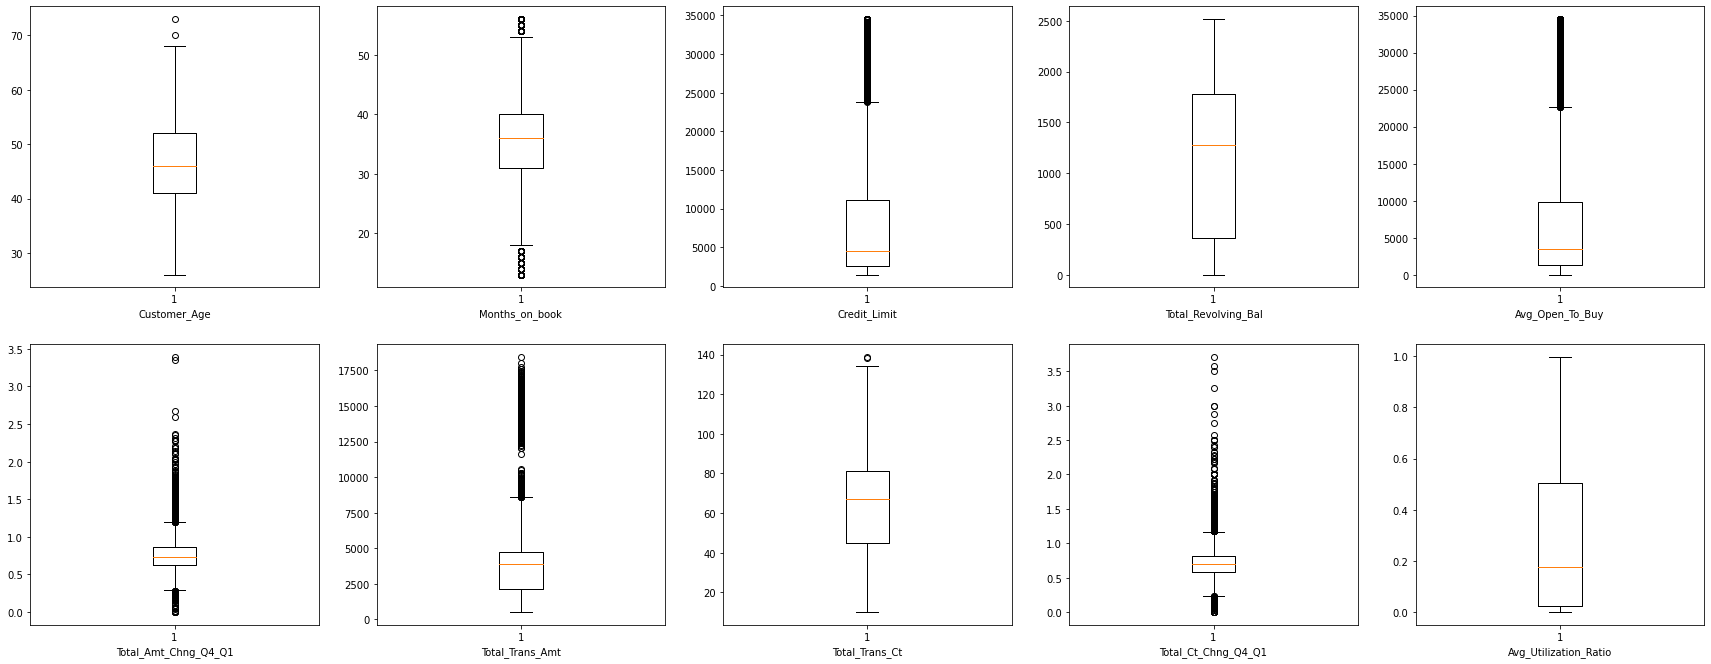

In [ ]:
#box plots of the numerical variables
plt.figure(figsize=(30,30))

for index, column in enumerate(continuous_variables_df.columns):
  plt.subplot(5,5,index+1)
  plt.boxplot(continuous_variables_df[column])
  plt.xlabel(column)
plt.show()

<function matplotlib.pyplot.show>

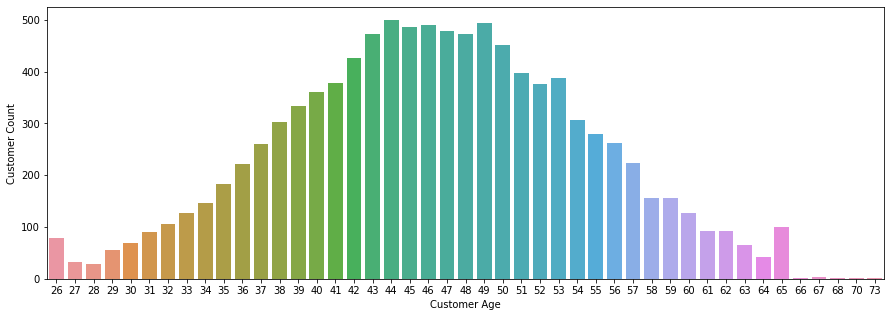

In [ ]:
#Age distribution
plt.figure(figsize=(15,5))
sns.barplot(x=creditcard_df.groupby(['Customer_Age'])['Attrition_Flag'].count().index, y=creditcard_df.groupby(['Customer_Age'])['Attrition_Flag'].count())
plt.xlabel('Customer Age')
plt.ylabel('Customer Count')
plt.show

In [ ]:
#statistical distribution of Age
creditcard_df['Customer_Age'].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

In [ ]:
#Pairplot
plt.figure(figsize=(30,50))
sns.pairplot(creditcard_df.drop(creditcard_df[['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']], axis=1), hue='Attrition_Flag')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#**---------------------Step 2: Feature Engineering and Selection-------------------------------**

---




#**Numerical Features**

##Correlation Matrix

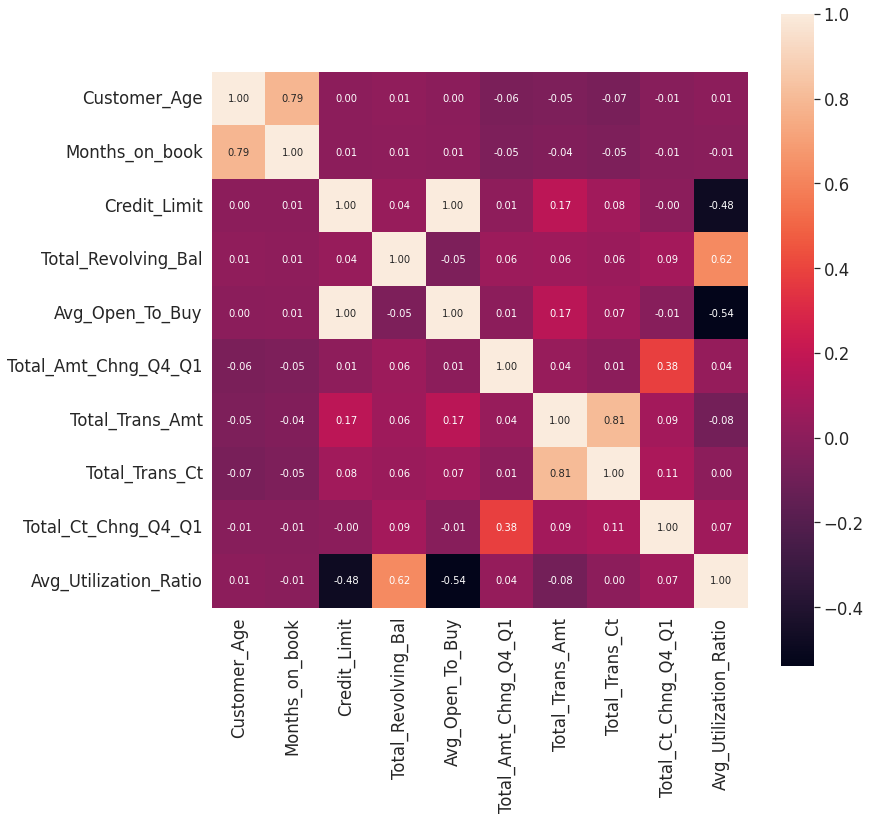

In [ ]:
#heat map of all continuous variables
continuous_variables_corr = continuous_variables_df.corr()
plt.figure(figsize=(12,12))
sns.set(font_scale=1.5)
sns.heatmap(continuous_variables_corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

###`Customer_Age` and `Months_on_book` are highly correlated.

###`Total_Trans_Amt` and `Total_Trans_Ct` are highly correlated.



#**Non-numerical Categorical Features**

In [ ]:
#show a dictionary containing the non-numerical variables and their unique values 
non_numerical_var_dict

{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Gender': ['M', 'F'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced']}

There are 2 binary variables `Attrition_Flag` and `Gender`, for with I will have to perform binary encoding. There are 2 ordinal variables `Education_Level` and `Income_Category`, for which I will perform ordinal enconding. I will perform one-hot encoding for `Marital_Status` and `Card_Category`.

There are some 'Unknown' categories in `Education_Level`, `Income_Category` and `Marital_Status`. I will replace the 'Unknown' categories with the mode of the most frequent category for `Education_Level` and `Income_Category`.

In [ ]:
#show the non-numerical variables
non_numerical_var_copy = non_numerical_var.copy()

In [ ]:
#check the modes of 'Education_Level' and 'Income_Category'
print(non_numerical_var_copy['Education_Level'].mode())
print(non_numerical_var_copy['Income_Category'].mode())

0    Graduate
dtype: object
0    Less than $40K
dtype: object


In [ ]:
#function that preprocesses the non-numerical variables
def preprocess_non_numerical(df):
  #fill nan with the mode of the variable categories
  df = df.replace('Unknown', np.NAN)
  #***************************************************************************************************************************

  #fill nan with the mode of categories
  df['Education_Level'] = df['Education_Level'].fillna('Graduate')
  df['Income_Category'] = df['Income_Category'].fillna('Less than $40K')
  #***************************************************************************************************************************

  #apply binary encoding
  df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)
  df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)
  #***************************************************************************************************************************

  #apply ordinal encoding
  #rank education levels
  #education_ranked = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
  #df['Education_Level'] = df['Education_Level'].apply(lambda x: education_ranked.index(x))
  #rank education levels
  #income_category_ranked = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
  #df['Income_Category'] = df['Income_Category'].apply(lambda x: income_category_ranked.index(x))
  #***************************************************************************************************************************

  #apply One-hot encoding
  #get dummy variables 'Education_Level'
  dummies_education = pd.get_dummies(df['Education_Level'], prefix="EDUCATION")
  #concat dummy variables to df
  df = pd.concat([df, dummies_education],axis=1)
  #drop 'Doctorate'
  df.drop(['Education_Level','EDUCATION_Doctorate'], axis=1, inplace=True)

  #get dummy variables 'Income_Category'
  dummies_income = pd.get_dummies(df['Income_Category'], prefix="INCOME")
  #concat dummy variables to df
  df = pd.concat([df, dummies_income],axis=1)
  #drop '$120K +'
  df.drop(['Income_Category', 'INCOME_$120K +'], axis=1, inplace=True)

  #get dummy variables 'Card_Category'
  dummies_card = pd.get_dummies(df['Card_Category'], prefix="CARD")
  #concat dummy variables to df
  df = pd.concat([df, dummies_card], axis=1)
  #drop 'Card_Category' and 'CARD_Platinum'
  df.drop(['Card_Category','CARD_Platinum'], axis=1, inplace=True)

  #get dummy variables for 'Marital_Status'
  dummies_marital = pd.get_dummies(df['Marital_Status'], prefix="MARITAL")
  #concat dummy variables to df
  df = pd.concat([df, dummies_marital], axis=1)
  #drop 'Marital_Status'
  df.drop('Marital_Status', axis=1, inplace=True)

  return df

non_numerical_var_df = preprocess_non_numerical(non_numerical_var)
non_numerical_var_df.head(3)

,Attrition_Flag,Gender,EDUCATION_College,EDUCATION_Graduate,EDUCATION_High School,EDUCATION_Post-Graduate,EDUCATION_Uneducated,INCOME_$40K - $60K,INCOME_$60K - $80K,INCOME_$80K - $120K,INCOME_Less than $40K,CARD_Blue,CARD_Gold,CARD_Silver,MARITAL_Divorced,MARITAL_Married,MARITAL_Single
0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0


###Merge the numerical and non-numerical dataframes.

In [ ]:
#concat numerical and non-numerical variables
df = pd.concat([numerical_variables_df, non_numerical_var_df], axis=1 )
df.head(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag,Gender,EDUCATION_College,EDUCATION_Graduate,EDUCATION_High School,EDUCATION_Post-Graduate,EDUCATION_Uneducated,INCOME_$40K - $60K,INCOME_$60K - $80K,INCOME_$80K - $120K,INCOME_Less than $40K,CARD_Blue,CARD_Gold,CARD_Silver,MARITAL_Divorced,MARITAL_Married,MARITAL_Single
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0


In [ ]:
df.to_csv('/content/drive/MyDrive/1_Thinkful_Colab_Notebooks/csv files/new_Creditcard_Churners.csv', index=False)